In [181]:
from util import *
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
spatial_id=[]
acc_ls=[]
accs_figure=[]
time_id=[]
def run_single_time_window(monkey, event_want, offset, time_window, spatial_step=3):
    accs = np.zeros((10-spatial_step+1, 10-spatial_step+1))
    all_feat, labels = get_all_feat_and_labels(monkey, event_want, offset, time_window)
    for i in range (1, 10-spatial_step+2):
        for j in range (1, 10-spatial_step+2): 
            elecs = get_electrodes(monkey, i, j, spatial_step)
            data = []
            for ch in elecs:
                if ch == -1: continue
                data.append(all_feat[ch]['st_feat'][:,None])
            if monkey == 'N':
                for ch in elecs:
                    if ch == -1: continue
                    data.append(all_feat[ch]['lfp_feat'])
            data = np.concatenate(data, axis=1)
            train_num=int(0.8*data.shape[0])

            X_train, y_train, X_test, y_test = data[:train_num], labels[:train_num], data[train_num:], labels[train_num:]
            # Normalize data
            scaler = StandardScaler()  # normalization: zero mean, unit variance
            scaler.fit(X_train)  # scaling factor determined from the training set

            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            #clf = MLPClassifier(hidden_layer_sizes=(50), learning_rate_init=0.01, max_iter=500, verbose=0)
            clf = SVC(kernel='sigmoid', C=1)
            clf.fit(X_train, y_train)

            accuracy = (clf.predict(X_test) == y_test).mean()
            spatial_id.append(str(i)+" "+str(j))
            acc_ls.append(accuracy)
            #accs_figure[i-1, j-1] = accuracy
            time_id.append(offset)
            
    
            
            
            


In [183]:
for t in range (0, 17):
    run_single_time_window('L', 'SR', -0.8+0.1*t, 0.1, 2)

ValueError: need at least one array to stack

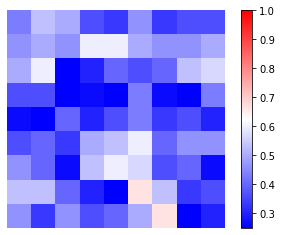

In [10]:
accs = run_single_time_window('L', 'SR', -1, 2, 2)

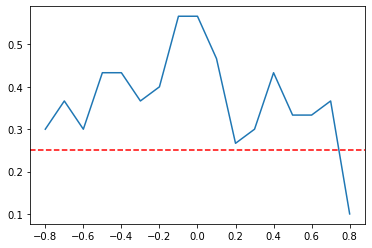

In [189]:
plt.plot(df2['Time Stamp'], df2['Accuracy'])
plt.axhline(0.25, linestyle='--', color='r')

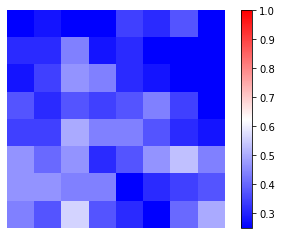

In [80]:
accs = run_single_time_window('N', 'GO-ON', 0, 0.5, 3) # MLP

In [88]:
spatial_id

['11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66']

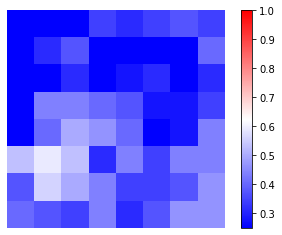

In [82]:
accs = run_single_time_window('N', 'GO-ON', 0, 0.5, 3)#SVM IGMOID

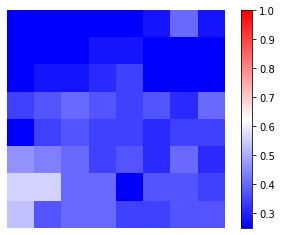

In [68]:
accs = run_single_time_window('N', 'GO-ON', 0, 0.5, 3)

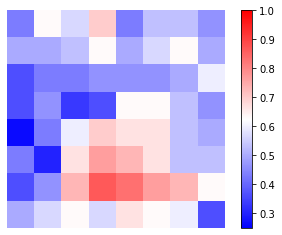

In [69]:
accs = run_single_time_window('L', 'GO-ON', 0, 0.5, 3)